In [3]:
# Example of chaotic migration using dynamical tides operator
import rebound
import reboundx
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 14})

# intial conditions
a0 = 1.5
e0 = 0.98
R_planet = 1.6 * 4.67e-4 # 1.6 Jupiter radii
m_planet = 1e-3 # approximately 1 Jupiter mass

# create simulation
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=m_planet, r=R_planet, a=a0, e=e0)
sim.move_to_com()

# load reboundx and the dynamical tides operator
rebx = reboundx.Extras(sim)
td = rebx.load_force('tides_dynamical')
rebx.add_force(td)

# set dP_crit = 0 to always carry out mode evolution
sim.particles[1].params['td_dP_crit'] = 0

# set initial modes to 0
sim.particles[1].params['td_c_imag'] = 0
sim.particles[1].params['td_c_real'] = 0

# record initial orbital energy
o = sim.particles[1].orbit(primary=sim.particles[0])
EB0 = -sim.G * sim.particles[1].m * sim.particles[0].m / (2 * o.a)

N = 10000
t = np.linspace(0, 1e4, N) # time
a = np.zeros(N) # semi-major axis
e = np.zeros(N) # eccentricity
E = np.zeros(N) # mode energy
E_sim = np.zeros(N) # simulation energy
L = np.zeros((N, 3)) # total angular momentum

for i, time in enumerate(t):
    o = sim.particles[1].orbit(primary=sim.particles[0])
    a[i] = o.a
    e[i] = o.e
    L[i, :] = sim.angular_momentum() 
    E[i] = abs(EB0) * (sim.particles[1].params['td_c_imag']**2 + sim.particles[1].params['td_c_real']**2)
    E_sim[i] = sim.energy()

    if i % 2 == 0 and i != 0:
        print(time, o.a, o.e, E[i], sim.particles[1].params['td_dP_hat'])
    
    sim.integrate(2 * np.pi * time)
    



2.000200020002 1.4999999999998919 0.9800000000000689 1.2006418221227483e-07 13.143233558910774
4.000400040004 1.4994582859603767 0.9799927895307351 1.0217351887244172e-07 39.393935812812956
6.0006000600060005 1.4995389817267024 0.9799938639588507 6.027028552791034e-08 37.36329375371735
8.000800080008 1.4997280200350462 0.9799963804696803 3.449284266443667e-07 31.75259005832547
10.00100010001 1.4984447730764443 0.9799792852224155 1.6063251319286762e-07 57.549504860560425
12.001200120012001 1.4992753496530509 0.9799903533596906 1.269835324544592e-07 43.49550530986933
14.001400140014 1.4978066752981967 0.9799707736856843 4.866571505083303e-07 40.13881359768915
16.001600160016 1.4993521414138218 0.9799913760891928 1.4359774216791362e-07 65.82674854237811
18.001800180018 1.4998752589078397 0.9799983400980351 2.7637613414370445e-08 41.84540978780914
20.00200020002 1.4989155897399362 0.9799855607729242 2.404300103491017e-07 25.749146533153677
22.002200220022 1.497375095460203 0.97996501277813

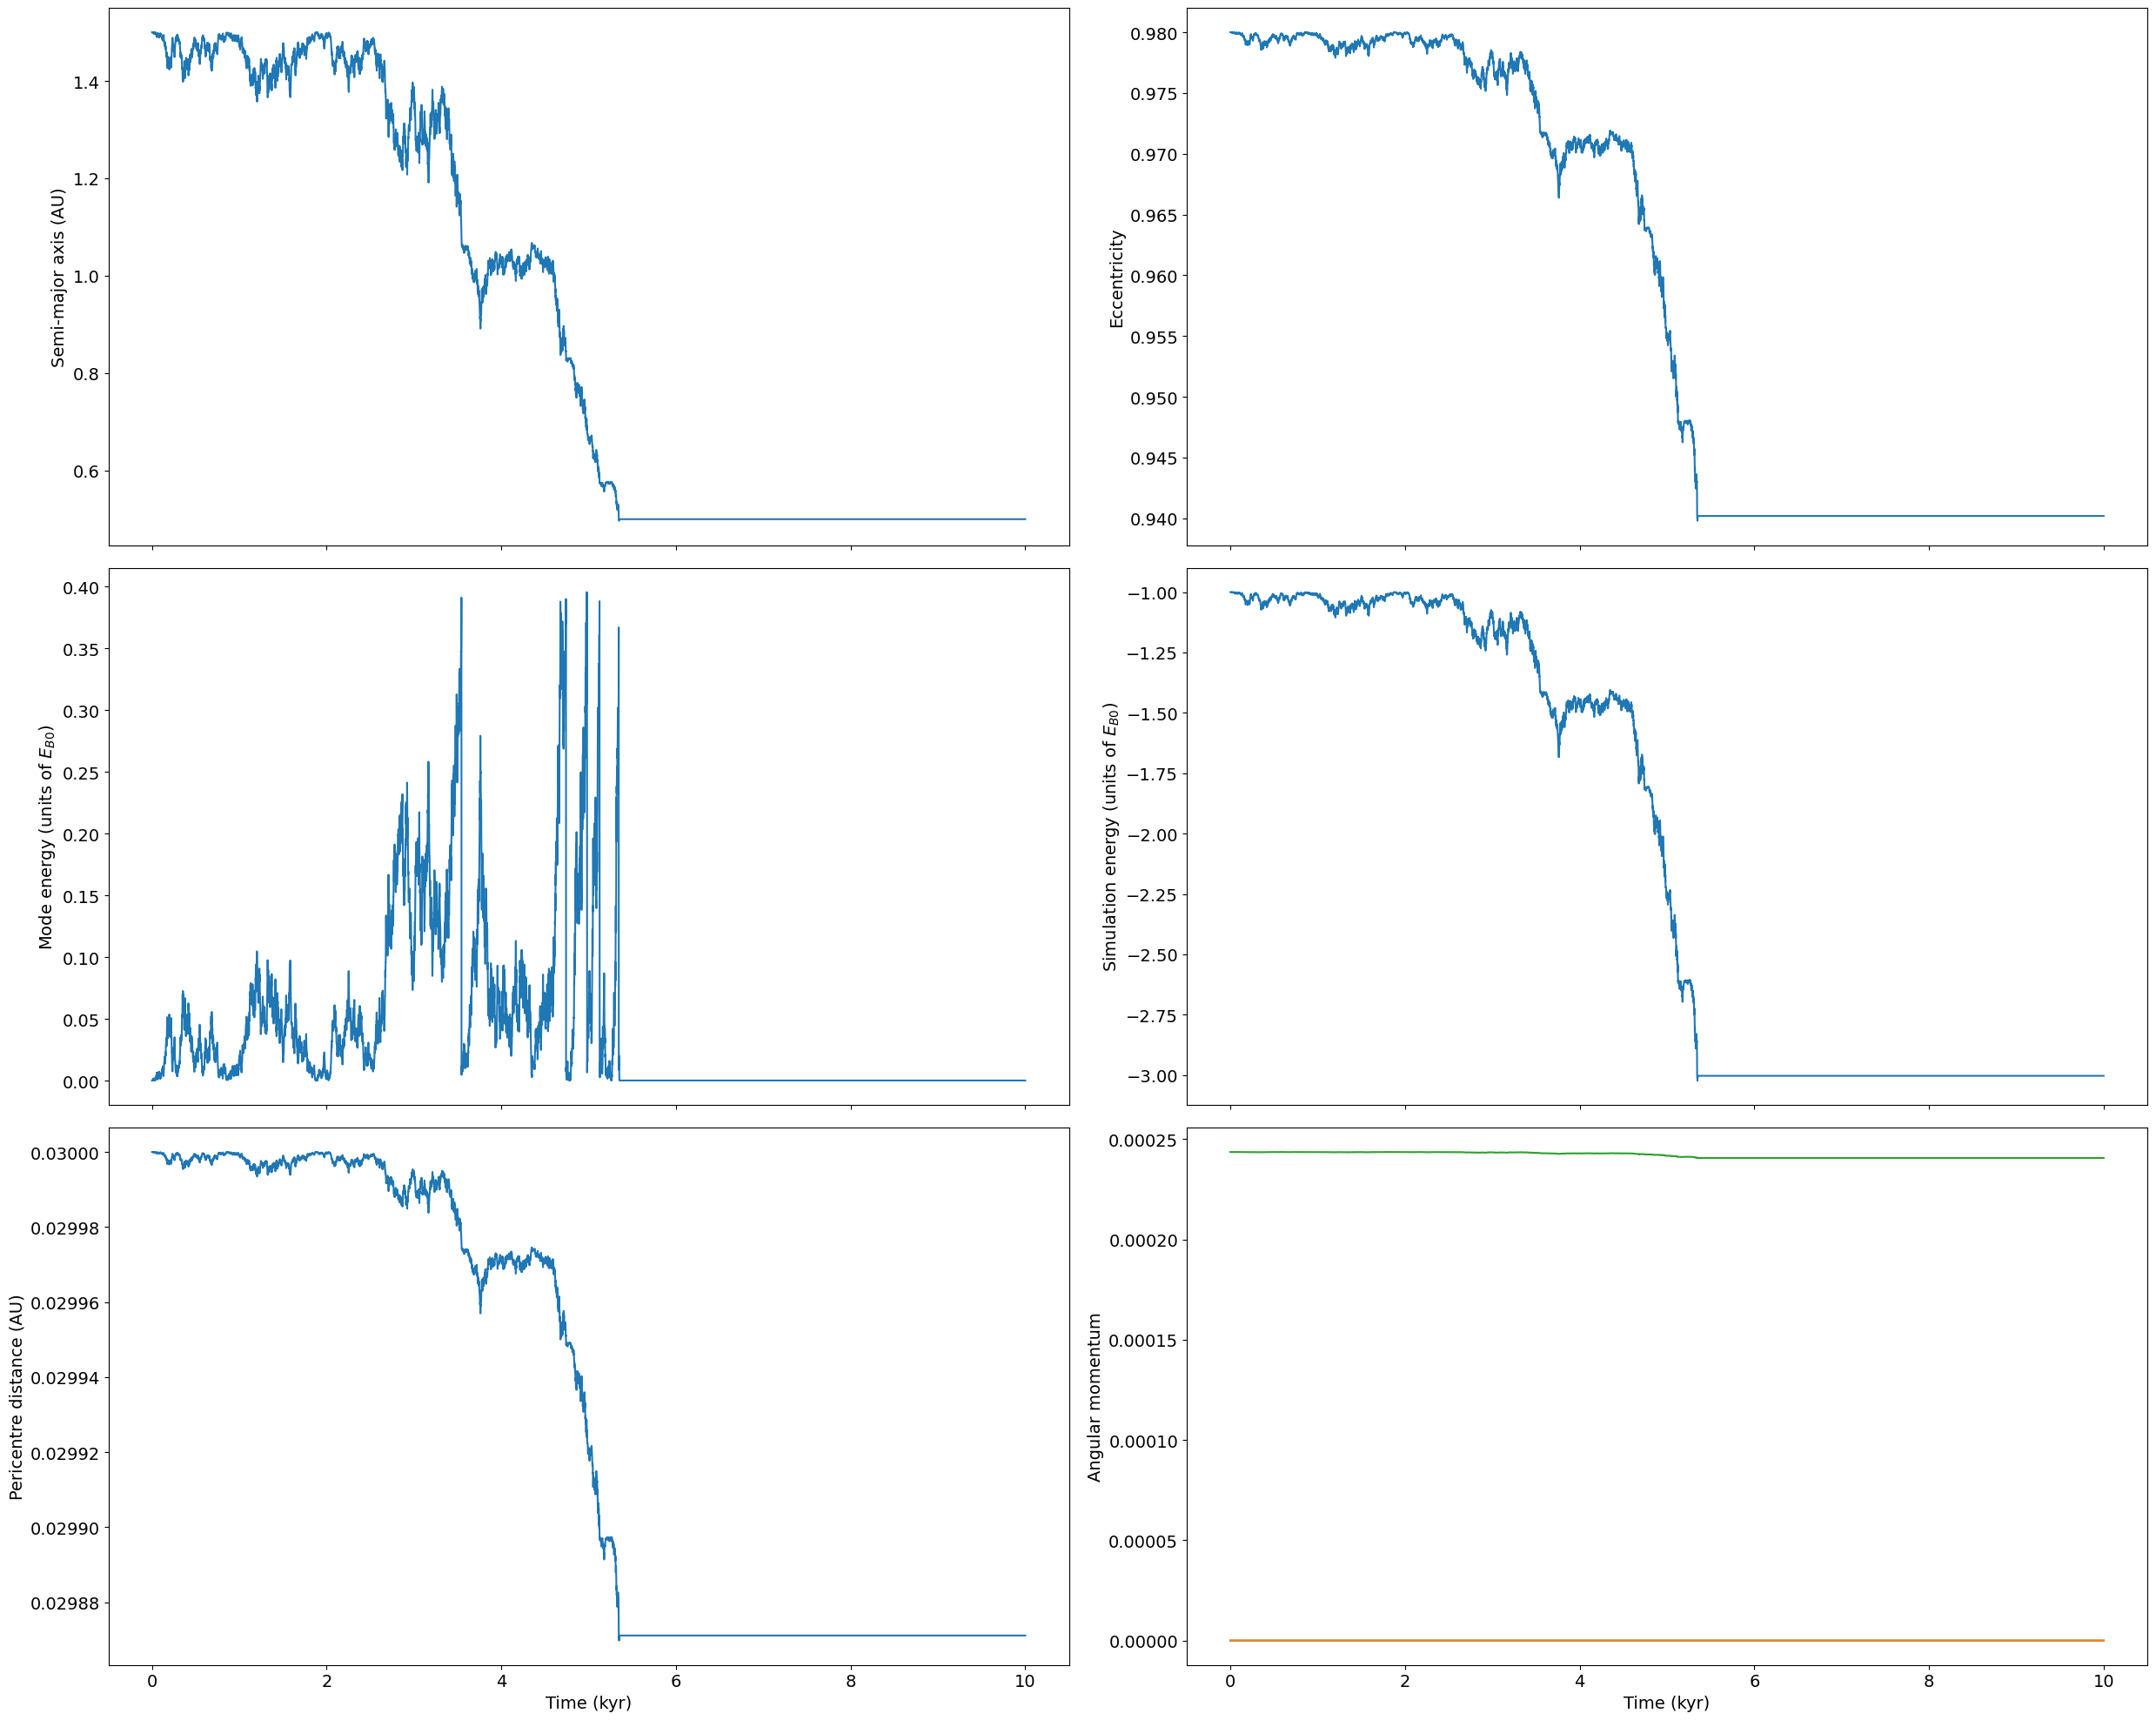

In [4]:
fig, axes = plt.subplots(3, 2, sharex=True)
fig.set_figheight(20)
fig.set_figwidth(25)


axes[0, 0].plot(t / 1e3, a)
axes[0, 0].set_ylabel(r'Semi-major axis (AU)')

axes[0, 1].plot(t / 1e3, e)
axes[0, 1].set_ylabel(r'Eccentricity')

axes[1, 0].plot(t / 1e3, -E / EB0)
axes[1, 0].set_ylabel(r'Mode energy (units of $E_{B0}$)')

axes[1, 1].plot(t / 1e3, -E_sim / EB0)
axes[1, 1].set_ylabel(r'Simulation energy (units of $E_{B0}$)')

axes[2, 0].plot(t / 1e3, a * (1-e))
axes[2, 0].set_ylabel(r'Pericentre distance (AU)')
axes[2, 0].set_xlabel(r'Time (kyr)')

axes[2, 1].plot(t / 1e3, L[:,0])
axes[2, 1].plot(t / 1e3, L[:,1])
axes[2, 1].plot(t / 1e3, L[:,2])
axes[2, 1].set_ylabel('Angular momentum')
axes[2, 1].set_xlabel(r'Time (kyr)')

plt.tight_layout()
#plt.savefig("timeseries_delay_0.png", dpi=150)
